In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib as mpl

In [2]:
caiso2030 = pd.read_csv('CAISO 2030.csv')
caiso2020 = pd.read_csv('Martinez_2020.csv')
ercot2030 = pd.read_csv('ERCOT 2030.csv')
ercot2019 = pd.read_csv('ERCOT 2019.csv')
ercot2020 = pd.read_csv('ERCOT 2020.csv')
caiso2030

,Hour,$/kWh
0,1,0.043292
1,2,0.051810
2,3,0.051150
3,4,0.049560
4,5,0.048170
...,...,...
8756,8757,0.053020
8757,8758,0.053040
8758,8759,0.052550
8759,8760,0.050080


In [3]:
def make_boxplot(dist1, string, title):
    fig, ax = plt.subplots(figsize=(2, 2))
    
    plt.title('Texas 2019', color='k', fontsize=14, fontname='Arial')    
    plt.ylabel(r'Electricity price (\$ kWh$\mathregular{^{-1}}$)', color='k', fontname='Arial', fontsize=14)
    
    # set up green diamond
    black_diamond = dict(markerfacecolor='g', marker='D')
    plt.boxplot(dist1[string], flierprops=black_diamond)
    
    plt.xticks(color='k', fontname='Arial', fontsize=14)
    plt.yticks(color='k', fontname='Arial', fontsize=14) 
    
    ax.set_yscale('log')
        
    ax.tick_params(axis='both', direction='in')
    ax.minorticks_off()
    plt.xticks([])
        
    plt.savefig(title+'.png',  bbox_inches='tight')
    
    

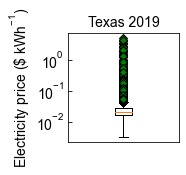

In [4]:
# ERCOT 2019
make_boxplot(ercot2019,'Inflated to 2020 prices',"Texas 2019")

# face ticks inward
# where should y start and end

In [8]:
def make_combined_boxplot(dist0, dist1, dist2, dist3, dist4, string, string2, logscale):
    
    # set up green diamond
    green_diamond = dict(markerfacecolor='g', marker='D')
    

    # Texas 2020, Texas 2030, California 2020, California 2030
    my_dict = {'Texas 2019':dist0[string2], 'Texas 2020': dist1[string], 'Texas 2030' : dist2[string],
              'California 2020': dist3[string], 'California 2030' : dist4[string]}

    fig, ax = plt.subplots(figsize=(9, 4))
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys(), color='k', fontname='Arial', fontsize=14)
    plt.axhline(y=0, color = 'k', linestyle = 'dashed', linewidth = 1)
    
    # set ticks
    plt.xticks(color='k', fontname='Arial', fontsize=14)
    ax.tick_params(axis='both', direction='in')
    
    # do titles
    plt.title('Electricity price distributions', color='k', fontsize=14, fontname='Arial')    
    plt.ylabel(r'Electricity price (\$ kWh$\mathregular{^{-1}}$)', color='k', fontname='Arial', fontsize=14)
    
    # set log scale 
    if logscale:
        plt.yscale('log')

    plt.savefig('combinedBoxplots.png',  bbox_inches='tight')

/Users/Mayavenkatraman/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


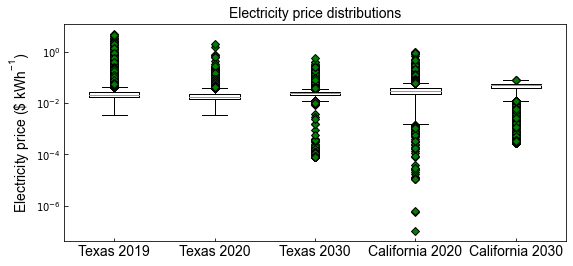

In [9]:
make_combined_boxplot(ercot2019, ercot2020, ercot2030, caiso2020, caiso2030, '$/kWh','Inflated to 2020 prices', True)

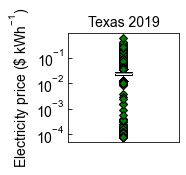

In [12]:
# ERCOT 2030
make_boxplot(ercot2030,'$/kWh',"Texas")

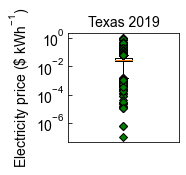

In [13]:
# Martinez 2020
make_boxplot(caiso2020,'$/kWh', "California")

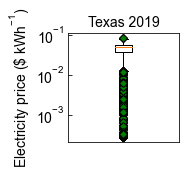

In [15]:
# CAISO 2030
make_boxplot(caiso2030,'$/kWh', "California")

In [16]:
def gen_histogram(df, string, title):
    prices = df[string]
    total = len(df)
    print(total)
  
    # Creating histogram
    fig, ax = plt.subplots(figsize=(4, 4))
    bins = range(-2, 15, 1)

    bins = [x/100 for x in bins]
    ax.hist(np.array(prices), bins)
    
    plt.axvline(x=0, ymin=0, ymax=6500, color = 'k', linestyle = 'dashed', linewidth = 1)
    
    plt.ylabel('Frequency', color='k', fontname='Arial', fontsize=14)
    plt.xlabel(r'Electricity price (\$ kWh$\mathregular{^{-1}}$)', color='k', fontname='Arial', fontsize=14)
    plt.xlim(-0.02, 0.15)
    plt.ylim(0,6500)
    
    plt.xticks(np.arange(-0.02, 0.15, step=0.03), color='k', fontname='Arial', fontsize=14)
    plt.yticks(color='k', fontname='Arial', fontsize=14)
    ax.tick_params(axis='both', direction='in')
    
    plt.title(title, color='k', fontname='Arial', fontsize=14) 
    
    ax = plt.gca()
    yticks = ax.yaxis.get_major_ticks() 
    yticks[0].label1.set_visible(False)
    
    plt.savefig(title+'.png',  bbox_inches='tight')

    # Show graphic
    plt.show()
    


In [17]:
def count_neg(dataset, stri):
    count = 0
    min = 0
    for val in dataset[stri]:
        if val < 0:
            if val < min:
                min = val
            count+=1
    return (count, min)

8760


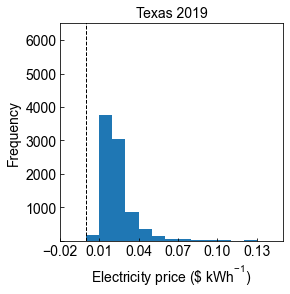

(0, 0)

In [18]:
gen_histogram(ercot2019, 'Inflated to 2020 prices', 'Texas 2019')
count_neg(ercot2019, 'Inflated to 2020 prices')

8783


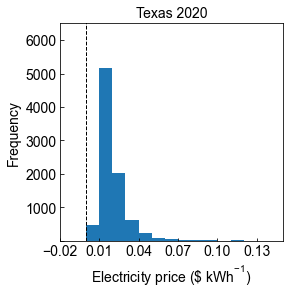

(0, 0)

In [19]:
gen_histogram(ercot2020, '$/kWh',  'Texas 2020')
count_neg(ercot2020, '$/kWh')

8760


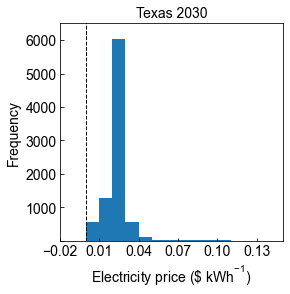

(0, 0)

In [20]:
gen_histogram(ercot2030, '$/kWh',  'Texas 2030')
count_neg(ercot2030, '$/kWh')

8783


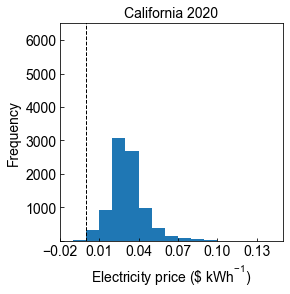

(29, -0.01067756)

In [21]:
gen_histogram(caiso2020, '$/kWh',  'California 2020')
count_neg(caiso2020, '$/kWh')

8761


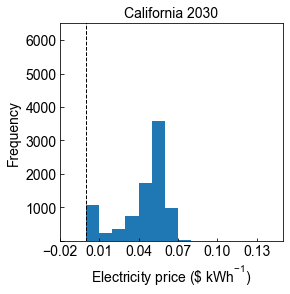

(0, 0)

In [22]:
gen_histogram(caiso2030, '$/kWh',  'California 2030')
count_neg(caiso2030, '$/kWh')